In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# BART Model

In [ ]:
# Fetch data into daataframe
data_frame = pd.read_excel(r'/content/drive/MyDrive/Data/data_2_withoutMask.xlsx')
data_frame.drop('Unnamed: 0', axis =1, inplace=True)

In [ ]:
!pip install simpletransformers

In [ ]:
# Dataframe shape
data_frame.shape

(465, 2)

In [ ]:
# Data spliting
train_df = data_frame.iloc[:372, :]
eval_df = data_frame.iloc[372:(372+47), :]
test_df = data_frame.iloc[(372+47):,:]

In [ ]:
import pandas as pd
from simpletransformers.seq2seq import Seq2SeqModel,Seq2SeqArgs

Epoch 5

In [ ]:
# Model parameters setting
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 5
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.max_length = 1024
model_args.optimizer = 'AdamW'
model_args.use_early_stopping = True
model_args.learning_rate = 0.0001

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=True,
)

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
# Fine tuning of BART model
history = model.train_model(train_df, eval_data=eval_df)

  0%|          | 0/372 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/47 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/47 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/47 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/47 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/47 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/47 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/47 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/47 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/6 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/47 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/47 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# Evaluate the model
results = model.eval_model(eval_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/47 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/6 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
results

{'eval_loss': 2.6912050247192383}

In [ ]:
history

(235,
 {'global_step': [47, 94, 141, 188, 235],
  'eval_loss': [2.8406929175059,
   2.741639177004496,
   2.676689346631368,
   2.69143807888031,
   2.6912050247192383],
  'train_loss': [2.8764383792877197,
   2.939365863800049,
   2.410339832305908,
   2.247499942779541,
   2.202986240386963]})

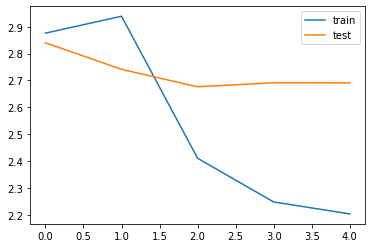

In [ ]:
# Train and test loss
from matplotlib import pyplot

pyplot.plot(history[1]['train_loss'], label='train')
pyplot.plot(history[1]['eval_loss'], label='test')
pyplot.legend()
pyplot.show()

Rouge

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge

In [ ]:
rouge = Rouge()

In [ ]:
test_df.reset_index(drop=True, inplace =True)

In [ ]:
reference_summary = test_df.iloc[:,1]

In [ ]:
# Use the model for prediction
model_out_put = []

for i in range(test_df.shape[0]):
  model_out_put.append(model.predict(
        [
           test_df.iloc[i,0]
        ]
    ))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Calculating the ROUGE value for all the test data
import pandas as pd
lst_of_df = []
for i in range(len(reference_summary)):
  model_out = model_out_put[i]
  reference = reference_summary[i]
  lst_of_df.append(pd.DataFrame(rouge.get_scores(model_out[0], reference)[0]))

In [ ]:
df1 = lst_of_df[0]
df2 = lst_of_df[1]

In [ ]:
for i in range(2,len(lst_of_df)):
  df2 = df2.add(df1, fill_value = 0)
  df1 = lst_of_df[i]

In [ ]:
# Average ROUGE score of the model over test data
df2/test_df.shape[0]

rouge-1   rouge-2   rouge-l
r  0.185580  0.048313  0.154104
p  0.370096  0.100995  0.307172
f  0.245699  0.064853  0.203940

In [ ]:
model_out_put[1]

["Australia 5 for 278 (Haddin 104, Clarke 93, Clarke 3-70) beat England 6 for 278 dec (Watson 89, Watson 3-65) by six wickets Scorecard and ball-by-ball details Michael Clarke's century set up Australia's six-wicket win Getty Images Michael Clarke and Michael Clarke set up a six-run victory over England in the first ODI at the SCG, as Australia's bowlers were left to defend a modest total. Clarke's 104 set up the victory, and the Australians' bowlers held their nerve to defend it"]

With Masking Data

Epoch 1

In [ ]:
data_frame = pd.read_excel(r'/content/drive/MyDrive/Data/data_2.xlsx')
data_frame.drop('Unnamed: 0', axis =1, inplace=True)

In [ ]:
data_frame.shape

(465, 2)

In [ ]:
# Dividing the data
train_df = data_frame.iloc[:32, :]
eval_df = data_frame.iloc[391:(391+49), :]
test_df = data_frame.iloc[(391+49):,:]

In [ ]:
# Model oarameters setting
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 5
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.max_length = 1024
model_args.optimizer = 'AdamW'
model_args.use_early_stopping = True
model_args.learning_rate = 0.0001

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=True,
)

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
history = model.train_model(train_df, eval_data=eval_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 1 of 5:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
results = model.eval_model(eval_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
results

{'eval_loss': 3.2196620532444546}

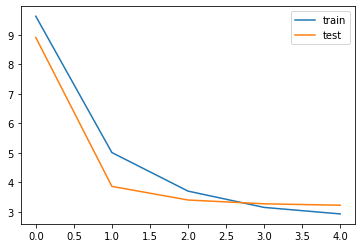

In [ ]:
 from matplotlib import pyplot

pyplot.plot(history[1]['train_loss'], label='train')
pyplot.plot(history[1]['eval_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Use the model for prediction
model_out_put = []

for i in range(test_df.shape[0]):
  model_out_put.append(model.predict(
        [
           test_df.iloc[i,0]
        ]
    ))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reference_summary = test_df.iloc[:,1]

In [ ]:
reference_summary = reference_summary.to_list()

In [ ]:
import pandas as pd
lst_of_df = []
for i in range(len(reference_summary)):
  model_out = model_out_put[i]
  reference = reference_summary[i]
  lst_of_df.append(pd.DataFrame(rouge.get_scores(model_out[0], reference)[0]))

In [ ]:
df1 = lst_of_df[0]
df2 = lst_of_df[1]

In [ ]:
for i in range(2,len(lst_of_df)):
  df2 = df2.add(df1, fill_value = 0)
  df1 = lst_of_df[i]

In [ ]:
df2/test_df.shape[0]

rouge-1   rouge-2   rouge-l
r  0.256268  0.067440  0.234991
p  0.138454  0.020296  0.127009
f  0.178560  0.031073  0.163765

In [ ]:
model_out_put[1]

["AustraliaAustralia beat Australia by six wickets in the third T20I at the SCG, with Player# Player# scoring a career-best 103 and Player# hitting a match-winning century. Player#'s innings was a highlight of the series, with the hosts' batting a revelation. Player # Player# was the key to Australia's victory, and Player # was the star of the show. Player Player#, who had been struggling with the bat, was a revelation in the field. Player* Player# took the field with a flourish, and the hosts were in control from the start. Player• Player# hit a century, Player# a century and Player* a century. Australia's innings finished with a flurry of runs.Player# Player #, Player # and Player• all scored half-centuries.Player # Player # hit a half-century, Player* hit a hundred and Player\xa0# a half century.Player* Player #'s century was the difference between the two sides.Player• Player # scored a century while Player# made a century of his own. Player\xa0 Player# scored a half ton. Player† P

Epoch 2

In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 2
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.max_length = 1024
model_args.optimizer = 'AdamW'
model_args.use_early_stopping = True
model_args.learning_rate = 0.0001

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=True,
)

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
history = model.train_model(train_df, eval_data=eval_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 0 of 2:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
results = model.eval_model(eval_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

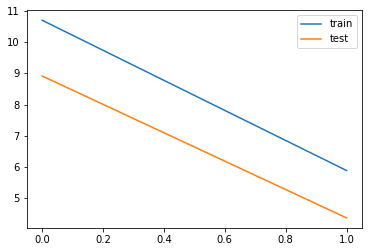

In [ ]:
 from matplotlib import pyplot

pyplot.plot(history[1]['train_loss'], label='train')
pyplot.plot(history[1]['eval_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# Use the model for prediction
model_out_put = []

for i in range(test_df.shape[0]):
  model_out_put.append(model.predict(
        [
           test_df.iloc[i,0]
        ]
    ))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reference_summary = test_df.iloc[:,1]

In [ ]:
reference_summary = reference_summary.to_list()

In [ ]:
import pandas as pd
lst_of_df = []
for i in range(len(reference_summary)):
  model_out = model_out_put[i]
  reference = reference_summary[i]
  lst_of_df.append(pd.DataFrame(rouge.get_scores(model_out[0], reference)[0]))

In [ ]:
df1 = lst_of_df[0]
df2 = lst_of_df[1]

In [ ]:
for i in range(2,len(lst_of_df)):
  df2 = df2.add(df1, fill_value = 0)
  df1 = lst_of_df[i]

In [ ]:
df2/test_df.shape[0]

rouge-1   rouge-2   rouge-l
r  0.104964  0.012868  0.096759
p  0.131763  0.010885  0.121400
f  0.113174  0.010872  0.104270

Epoch 3

In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 1
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.max_length = 1024
model_args.optimizer = 'AdamW'
model_args.use_early_stopping = True
model_args.learning_rate = 0.0001

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=True,
)

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/971M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
history = model.train_model(train_df, eval_data=eval_df)

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
results = model.eval_model(eval_df)

  0%|          | 0/49 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Use the model for prediction
model_out_put = []
# test_data = data_frame.iloc[381:, :]
for i in range(test_df.shape[0]):
  model_out_put.append(model.predict(
        [
           test_df.iloc[i,0]
        ]
    ))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reference_summary = test_df.iloc[:,1]

In [ ]:
reference_summary = reference_summary.to_list()

In [ ]:
import pandas as pd
lst_of_df = []
for i in range(len(reference_summary)):
  model_out = model_out_put[i]
  reference = reference_summary[i]
  lst_of_df.append(pd.DataFrame(rouge.get_scores(model_out[0], reference)[0]))

In [ ]:
df1 = lst_of_df[0]
df2 = lst_of_df[1]

In [ ]:
for i in range(2,len(lst_of_df)):
  df2 = df2.add(df1, fill_value = 0)
  df1 = lst_of_df[i]

In [ ]:
df2/test_df.shape[0]

rouge-1   rouge-2   rouge-l
r  0.099269  0.009373  0.089323
p  0.190150  0.017263  0.173199
f  0.123040  0.011511  0.111066

In [ ]:
model_out[0]

'Australia digit# for digit# (Player# digit#, Player# digit*-digit#) beat Sri Lanka digit#-digit'

*Epoch* 8

In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 10
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.max_length = 1024
model_args.optimizer = 'AdamW'
model_args.use_early_stopping = True
model_args.learning_rate = 0.0001

# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=True,
)

Downloading:   0%|          | 0.00/1.56k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/971M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
history = model.train_model(train_df, eval_data=eval_df)

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:   0%|          | 0/8 [00:00<?, ?it/s]

Running Epoch 0 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 1 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 2 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 3 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 4 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 5 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 6 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 7 of 8:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
results = model.eval_model(eval_df)

  0%|          | 0/49 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

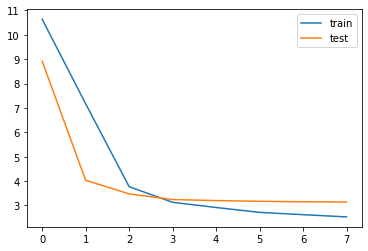

In [ ]:
 from matplotlib import pyplot

pyplot.plot(history[1]['train_loss'], label='train')
pyplot.plot(history[1]['eval_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reference_summary = test_df.iloc[:,1]

In [ ]:
reference_summary = reference_summary.to_list()

In [ ]:
# Use the model for prediction
model_out_put = []
# test_data = data_frame.iloc[381:, :]
for i in range(test_df.shape[0]):
  model_out_put.append(model.predict(
        [
           test_df.iloc[i,0]
        ]
    ))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
lst_of_df = []
for i in range(len(reference_summary)):
  model_out = model_out_put[i]
  reference = reference_summary[i]
  lst_of_df.append(pd.DataFrame(rouge.get_scores(model_out[0], reference)[0]))

In [ ]:
df1 = lst_of_df[0]
df2 = lst_of_df[1]

In [ ]:
for i in range(2,len(lst_of_df)):
  df2 = df2.add(df1, fill_value = 0)
  df1 = lst_of_df[i]

In [ ]:
df2/test_df.shape[0]

In [ ]:
model_out_put[2]

['Player###, digit#, the digit# digit#- digit# run-by-digit# digit-by digit#.Player# to digit# player# digit digit# Player# digit, digit-digit digit# by digit# and digit# number-digit-digit by digit- digit-number-digit, digit digit-dig digit-match digit-player-digit number-bydigit- digit digit digit by digit digit, and digit-figure digit-run digit- by digit, by digit number-dig-digit and digit digit number digit-Dig-digit run digit-drive digit-ball digit-digital digit-format digit-video digit-v digit-V digit-D digit-Digital digit-Player# digit number, digit number by digit and digit number of digit-based digit-playing digit-pad digit-num digit-in digit-and digit-dot digit-field digit-play digit-over digit-win digit-winning digit-winner digit-final digit-plus digit-day-digit player-digit to digit-four digit-wicket digit-two digit-three digit-five digit-six digit-seven digit-eight digit-nine digit-ten digit-one digit-a digit-b digit-d digit-p digit-e digit-c digit-f digit-y digit-h digit

Epoch 30

In [ ]:
model_args = Seq2SeqArgs()
model_args.num_train_epochs = 30
model_args.no_save = True
model_args.evaluate_generated_text = True
model_args.evaluate_during_training = True
model_args.evaluate_during_training_verbose = True
model_args.max_length = 1024
model_args.optimizer = 'AdamW'
model_args.use_early_stopping = True
model_args.learning_rate = 0.0001
# Initialize model
model = Seq2SeqModel(
    encoder_decoder_type="bart",
    encoder_decoder_name="facebook/bart-large",
    args=model_args,
    use_cuda=True,
)

In [ ]:
def count_matches(labels, preds):
    print(labels)
    print(preds)
    return sum(
        [
            1 if label == pred else 0
            for label, pred in zip(labels, preds)
        ]
    )

In [ ]:
history = model.train_model(train_df, eval_data=eval_df)

  0%|          | 0/32 [00:00<?, ?it/s]

Epoch:   0%|          | 0/30 [00:00<?, ?it/s]

Running Epoch 0 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 1 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 2 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 3 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 4 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 5 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 6 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 7 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 8 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 9 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 10 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 11 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 12 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 13 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 14 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 15 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 16 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 17 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 18 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 19 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 20 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 21 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 22 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 23 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 24 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 25 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 26 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 27 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 28 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

Running Epoch 29 of 30:   0%|          | 0/4 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
results = model.eval_model(eval_df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/49 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/7 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/7 [00:00<?, ?it/s]

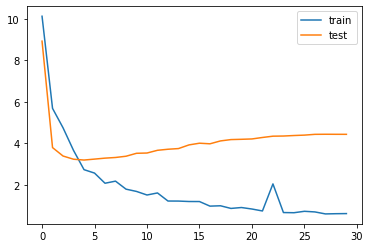

In [ ]:
from matplotlib import pyplot

pyplot.plot(history[1]['train_loss'], label='train')
pyplot.plot(history[1]['eval_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reference_summary = test_df.iloc[:,1]

In [ ]:
reference_summary = reference_summary.to_list()

In [ ]:
# Use the model for prediction
model_out_put = []
# test_data = data_frame.iloc[381:, :]
for i in range(test_df.shape[0]):
  model_out_put.append(model.predict(
        [
           test_df.iloc[i,0]
        ]
    ))

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

Generating outputs:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import pandas as pd
lst_of_df = []
for i in range(len(reference_summary)):
  model_out = model_out_put[i]
  reference = reference_summary[i]
  lst_of_df.append(pd.DataFrame(rouge.get_scores(model_out[0], reference)[0]))

In [ ]:
df1 = lst_of_df[0]
df2 = lst_of_df[1]

In [ ]:
for i in range(2,len(lst_of_df)):
  df2 = df2.add(df1, fill_value = 0)
  df1 = lst_of_df[i]

In [ ]:
df2/test_df.shape[0]

rouge-1   rouge-2   rouge-l
r  0.152617  0.016540  0.127020
p  0.279776  0.034293  0.232818
f  0.196446  0.022153  0.163492

In [ ]:
model_out_put[2]

["Australia 196 for 7 (Player# 67, Player# 3-32, Player #3-34) beat New Zealand 146 (Playertian 45, Playertian 3-26, Playercson 3-24) by 60 runs New Zealand's bowlers answered every question asked of them to snatch an unlikely victory and level the ODI series 1-1 as Player# Player# and Player# Al Player# finished the bout the way they had started it in Christchurch. After winning the toss and choosing to bat first, Playerson propelled Australia to 194 for 7 with 65 off 44 balls, his third half-century in four innings this series."]